# RNN (Recurrent neural network)

# 순차 데이터(sequential data)

- 텍스트나 시계열 데이터(time series data)와 같이 순서에 의미가 있는 데이터
    - 예) "I am a boy"는 의미를 이해할 수 있지만 "boy am I a"는 의미를 이해할 수 없음
    - 일별 온도 데이터에서 날짜 순서가 섞인다면 내일의 온도를 쉽게 예상하기 어려움
    
- 감성분석에서는 이전에 입력된 데이터를 기억하는 기능이 중요할 수 있음
    - 예) "별로지만 추천해요"에서 "추천해요"를 해석할 때 앞의 "별로지만"을 기억하고 있어야 무조건 긍정이라고 판단하지 않음
    - 퍼셉트론이나 CNN은 이런 기억장치가 없음
        - 하나의 배치를 사용하여 정방향 연산을 수행하고 나면 해당 샘플은 다음 샘플을 처리할 때 사용하지 않음
        - 이처럼 입력 데이터의 흐름이 앞으로만 전달되는 신경망을 피드포워드 신경망(feedforward neural network:FFNN)이라고 함
    - 신경망이 이전에 처리했던 샘플을 다음 샘플을 처리할 때 재사용하기 위해서는 데이터가 신경망 층에서 순환을 해야 함

# 순환 신경망(recurrent neural network : RNN)

<img src = "./image/rnn.png">

## 순환 신경망 구조

- 피드포워드 신경망에 이전 데이터의 처리 흐름을 순환하는 고리 하나만 추가된 형태
    - 바로 이전에 사용했던 데이터를 재사용하는 구조

<img src = "./image/rnn_image1.png">

1. 첫 번째 샘플 x0를 처리하고 출력 h0이 다시 뉴런으로 입력됨
    - h0에는 x0에 대한 정보가 포함되어 있음

2. x1을 처리할 때 h0을 함께 사용
    - h0과 x1을 사용해서 만든 h1에는 x0에 대한 정보가 어느 정도 포함되어 있음

3. x2를 처리할 때 h1을 함께 사용
    - 결과물 h2에는 x1과 x0에 대한 정보도 담겨있음
    
- 위의 과정처럼 샘플을 처리하는 각 단계를 타임스텝(timestep)이라고 말함
    - 순환 신경망은 이전 타임스텝의 샘플을 기억한다
    
- 타임스텝이 오래될수록 순환되는 정보는 희미해짐

- 순환신경망에서는 layer를 셀(cell)이라고 부름
    - 하지만 입력에 가중치를 곱하고 활성화 함수를 통과시켜 다음 층으로 전달하는 기본 구조는 똑같음
    - 한 셀에는 여러 개의 뉴런이 있지만 일반적으로 모든 뉴런을 표시하지 않고 하나의 셀로 층을 표현함
    
- 셀의 출력은 은닉 상태(hidden state)라고 부름

## 하이퍼볼릭 탄젠트 함수

<img src = "./image/tanh.png">

- 일반적으로 은닉층의 활성화 함수로는 하이퍼볼릭 탄젠트(hyperbolic tangent)함수인 tanh가 많이 활용됨
    - tanh함수는 -1 ~ 1 사이의 범위를 가짐

## 가중치 공유

<img src = "./image/rnn_weight.png">

- 순환 신경망도 피드포워드 신경망과 같이 입력값과 가중치를 곱하지만 이전 타임스텝의 은닉상태에 곱해지는 가중치가 하나 더 있음
- 모든 타임스텝에서 사용되는 가중치 w는 하나임
    - 가중치 w는 타임스텝에 따라 변화되는 뉴런의 출력을 학습
- 맨 처음 타임스텝1에서 사용되는 이전 은닉상태 h0는 이전 타임스텝이 없기 때문에 0으로 초기화

## 파라미터 수

<img src = "./image/rnn_param.png">

- 각 뉴런의 은닉 상태가 다음 스텝에 재사용될 때 모든 뉴런에 값이 전달됨
    - 즉, 이전 타임스텝의 은닉 상태는 다음 타임스텝의 모든 뉴런에 완전연결됨
- 순환신경망의 파라미터 수 = (유닛 수 * 유닛 수) + (입력값의 수 * 유닛 수) + 유닛 수

## 입력

- 합성곱 층의 입력은 하나의 샘플이 3개의 차원을 가짐
    - 너비, 높이, 채널
    
- 순환층은 일반적으로 샘플마다 2개의 차원을 가짐
    - 하나의 샘플을 하나의 시퀀스(sequence)라고 말함
    - 하나의 시퀀스 안에는 여러 개의 아이템이 들어 있음
    - 시퀀스의 길이가 타임 스텝의 길이가 됨
        - 예) 샘플 "I am a boy"는 4개의 아이템으로 구성된 시퀀스
        - 각 아이템을 3개의 숫자로 표현한다면 타임스텝의 크기는 (1, 4, 3)
        
- 입력이 순환층을 통과하면 순환층의 뉴런 개수만큼 출력됨
    - 하나의 샘플은 (단어의 개수, 단어 표현)의 2차원 배열
    - 순환층을 통과하면 1차원 배열로 바뀜
        - 이 1차원 배열의 크기는 순환층의 뉴런의 개수
    - 기본적으로 순환층은 마지막 타임스텝의 은닉 상태만 출력으로 내보냄
        - 입력된 시퀀스를 모두 읽어서 정보를 마지막 은닉 상태에 압축하여 전달
            - ex) 스팸메일을 받고 단어 하나 하나만으로는 판별 불가. 모든 내용을 보고 판별해야 함
            
- 만약 순환층을 여러 개 쌓는다면
    - 순환층의 입력은 샘플마다 타임스텝과 단어 표현으로 이루어진 2차원 배열이어야 함
        - 

# IMDB 리뷰 데이터셋

- 유명한 인터넷 영화 데이터베이스인 imdb.com에서 수집한 리뷰의 감상평에 따라 긍정과 부정으로 분류해 놓은 말뭉치

## 자연어 처리(natural language procession: NLP)

- 컴퓨터를 사용해 인간의 언어를 처리하는 분야
- 세부 분야
    - 음성 인식
    - 기계 번역
    - 감성 분석
    
- 자연어 처리 분야에서는 훈련 데이터를 말뭉치(corpus)라고 부름

## 임베딩

- 사람이 쓰는 자연어를 기계가 이해할 수 있는 숫자의 나열인 벡터로 바꾼 결과 혹은 그 과정 전체
- 컴퓨터에서 처리하는 모든 것은 숫자로 이루어진 데이터
    - 따라서 텍스트 그 자체를 신경망에 전달하지 않음
    - 합성곱 신경망에서 이미지를 다룰 때 이미지가 정수 픽셀값으로 이루어져 있어서 특별히 변환을 하지 않음
    
- 텍스트 임베딩의 가장 쉬운 방법은 데이터에 등장하는 단어마다 고유한 정수를 부여하는 것
    - 예)
        - he : 10
        - follow : 11
        - the : 12
        - cat : 13
    - 단어에 매핑되는 정수는 단어의 의미나 크기와 관련이 없음
        - he를 10으로 매핑하고 cat을 13에 매핑하더라도 cat이 he보다 좋거나 크다는 뜻이 아님
        
    - 정수 중 몇 가지는 특정한 용도로 예약되어 있는 경우가 많음
        - 0 ; 패딩, 1 : 문장의 시작, 2 : 어휘 사전에 없는 토큰
            - 어휘 사전 : 훈련 세트에서 고유한 단어를 뽑아 만든 목로
            
- 일반저긍로 영어 문장은 모두 소문자로 바꾸고 구두점을 삭제한 기준으로 분리
    - 이렇게 분리한 단어를 토큰(token)이라고 부름
        - 하나의 샘플은 여러 개의 토큰으로 이루어져 있고 이 때 하나의 토큰이 하나의 타음스텝에 해당
    - 영어 말뭉치에서 토큰은 단어와 같이 취급하는 경우가 많음
        - 한국어는 조사가 발달되어 있어 공백으로 나누는 것 만으로는 부족함
            - 일반적으로 한글은 형태소 분석을 통해 토큰을 불리

# 원핫 인코딩을 활용한 RNN텍스트 분류

## 데이터 준비

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 전체 데이터셋에서 가장 자주 등장하는 단어 500개만 사용
# num_words : 단어 빈도가 가장 많은 순서로 num_words만큼 보존한다
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 500)

17464789/17464789 [==============================] - 7s 0us/step


In [3]:
# 훈련 세트, 테스트 세트의 크기 확인
print(x_train.shape, x_test.shape)

(25000,) (25000,)


In [4]:
# 리뷰의 길이 출력
len(x_train[0]), len(x_train[1])

(218, 189)

In [5]:
type(x_train[0])

list

- 각각 25000개의 샘플로 이루어져 있음
- 텍스트 길이가 제각각임
    - 고정 크기의 2차원 배열에 담는 것 보다 리뷰마다 별도의 파이썬 리스트로 담아야 메모리를 효율적으로 사용할 수 있음

In [6]:
print(x_train[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [7]:
# 타겟 데이터
# 0 : 부정, 1 : 긍정
print(y_train[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [8]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = .2, random_state = 486)

### 각 리뷰의 길이 확인

- 각 리뷰의 길이를 넘파이 배열로 담아 평균 리뷰 길이, 길이 최소값, 길이 최대값을 확인

In [9]:
length = np.array([len(x) for x in x_train])

In [10]:
# 길이 평균값과 중앙값
print(np.mean(length), np.median(length), np.min(length), np.max(length))

238.3296 178.0 11 2494


In [11]:
plt.style.use(["dark_background"])

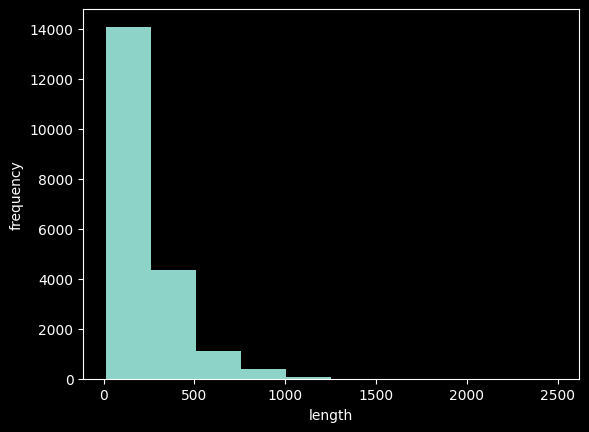

In [12]:
plt.figure()

plt.hist(length)

plt.xlabel("length")
plt.ylabel("frequency")

plt.show()

- 평균이 중간값보다 높은 이유는 아주 큰 데이터가 있기 때문
- 대부분의 리뷰는 짧기 때문에 이번 예제에서는 리뷰의 길이를 100에 맞춰서 사용
    - 100보다 짧은 리뷰는 길이를 100에 맞추기 위해 패딩이 필요
        - 패딩을 나타내는 토큰으로는 0을 사용

In [13]:
# x_train의 길이를 100으로 맞추기
train_seq = pad_sequences(x_train, maxlen = 100)

- maxlen에 원하는 길이를 지정하면 그것보다 긴 경우는 잘라내고 짧은 경우는 0으로 패딩

In [14]:
# train_seq 크기 확인
train_seq.shape

(20000, 100)

In [15]:
print(train_seq[0])

[ 30  55  52   2   4  65   9  24   2  12   9 254   8 264  15   6 226   2
  80   2   2   8  81 233  29 494  43  88  36  26   2   7  27   2  82  54
   6 132 287  90   6 318   2  15  80   2   2  38  29  47  24   8   2   4
   2  25   2  15  48  15  80  97  90   2 138  32   4   2  28  24   2  12
  13 104  15  14  22 144  24  28  77   2  88 101  22  19   2   9 290 319
   5  11   2   7  94   2  12   9 131   2]


In [16]:
print(x_train[0][-10:])

[5, 11, 2, 7, 94, 2, 12, 9, 131, 2]


- pad_sequence() 함수는 기본적으로 maxlen보다 긴 시퀀스의 앞 부분을 잘라냄
    - 일반적으로 시퀀스 뒷 부분의 정보가 더 유용하기 때문
        - 리뷰의 결정적인 소감을 말할 가능성이 높음
    - 시퀀스의 뒷 부분을 잘라내고 싶다면
        - truncating 매개변수 값을 "post"로 변경
            - 기본값은 "pre"

In [17]:
train_seq[11]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1, 280,  11,
         6, 137,  25,  79,   2, 120,  89,  78,   6,  22,  70,  30,   5,
        89,  11,   4, 182,   2, 100,   2, 278,   8,  97,  14, 243,   7,
         2,  50,   9, 427,  57,   2,   2,  11,  14,  22,  39,   6,   2,
       229,   8,   6,   2,  65,   8,   2, 116, 480])

- 패딩 토큰은 시퀀스의 앞 부분에 추가됨
    - 시퀀스의 마지막에 있는 단어가 셀의 은닉상태에 가장 큰 영향을 미치게 되기 때문에
    - 뒷 부분에 패딩을 추가하고 싶다면
        - padding 매개변수의 값을 "post"로 수정
            - 기본값은 "pre"

In [18]:
# 검증 세트의 길이를 100으로 맞추기
val_seq = pad_sequences(x_val, maxlen = 100)

## 모델 구성

- 케라스의 SimpleRNN 클래스 활용
- 이진 분류
    - 출력층은 1개의 뉴런을 가지고 시그모이드 출력층 함수를 사용

In [19]:
model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape = (100, 500)))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

- SimpleRNN
    - 첫 번째 매개변수는 사용할 뉴런의 개수
    - input_shape
        - 입력 차원의 첫 번째 차원은 샘플의 길이
        - 입력 차원의 두 번째 차원은 고유한 단어 수(num_words)
            - load_data()함수에서 500개의 단어만 사용하도록 지정했기 때문에 이번 예제의 고유한 단어 수는 500
    - activation
        - 기본값은 "tanh"
            - 하이퍼볼릭 탄젠트

- 원핫인코딩을 사용하는 이유
    - 토큰을 정수로 변환한 데이터를 그대로 신경망에 주입하면 큰 점수가 큰 활성화 출력을 만듦
        - 정수 사이에는 어떤 관련도 없고 20번 토큰이 10번 토큰보다 중요한 것이 아님

In [20]:
# 케라스에서 제공하는 원핫인코딩을 위한 함수
train_oh = keras.utils.to_categorical(train_seq)

In [21]:
print(train_oh.shape)

(20000, 100, 500)


In [22]:
print(train_oh[0][0][:100])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [23]:
print(np.sum(train_oh[0][0]))

1.0


- 하나의 원소만 1이고 나머지 원소는 모두 0임

In [24]:
# val_seq 원핫인코딩
val_oh = keras.utils.to_categorical(val_seq)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


- SimpleRNN에 전달할 샘플의 크기는 (100, 100)이지만 순환층은 마지막 타임스텝의 은닉 상태만 출력
    - 출력의 크기가 순환층의 뉴런 개수와 동일
    
- 파라미터 개수
    - 입력 토큰은 500 차원의 원핫인코딩 배열
    - 배열이 순환층의 뉴런 8개와 완전연결
        - 500 * 8 = 4000
        
    - 순환층의 은닉상태는 다시 다음 타임스텝에 사용하기 위해 또 다른 가중치와 곱해짐
        - 은닉상태의 크기 * 뉴런개수
            - 8 * 8 = 64
            
    - 각 뉴런마다 하나의 절편
        - 8
    
    - 4000 + 64 + 8 = 4072

# 모델 훈련

In [26]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-simplernn-model.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

In [27]:
history = model.fit(train_oh, y_train, epochs = 100, batch_size = 64, validation_data = (val_oh, y_val),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 16ms/step - loss: 0.6974 - accuracy: 0.5052 - val_loss: 0.6933 - val_accuracy: 0.5162
Epoch 2/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6923 - accuracy: 0.5160 - val_loss: 0.6916 - val_accuracy: 0.5220
Epoch 3/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6904 - accuracy: 0.5263 - val_loss: 0.6903 - val_accuracy: 0.5308
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6887 - accuracy: 0.5385 - val_loss: 0.6887 - val_accuracy: 0.5358
Epoch 5/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6856 - accuracy: 0.5538 - val_loss: 0.6832 - val_accuracy: 0.5560
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6710 - accuracy: 0.5997 - val_loss: 0.6645 - val_accuracy: 0.6074
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6530 - accuracy: 0.6382 - val_loss: 0.6476 - val_accuracy:

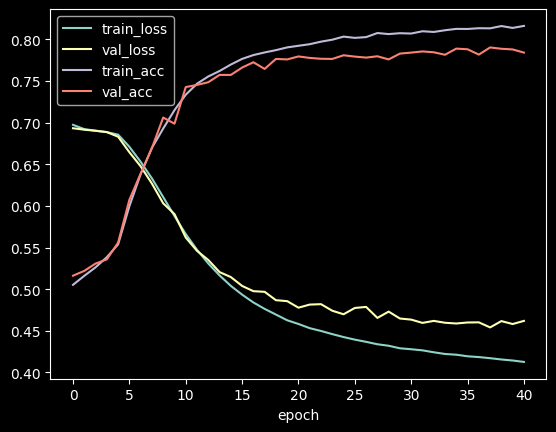

In [28]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

- 원핫인코딩의 단점
    - 입력 데이터가 매우 커짐

In [29]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


In [31]:
train_oh.nbytes / train_seq.nbytes

500.0

- 토큰 1개를 500차원으로 늘렸기 때문에 500배가 커짐
    - 훈련 데이터가 커질수록 문제가 더 심해짐

# 단어 임베딩을 활용한 RNN 텍스트 분류

<img src = "./image/embedding.png">

- 단어 임베딩(word embedding)
    - 순환 신경망에서 텍스트를 처리할 때 즐겨 사용하는 방법
    - 각 단어를 고정된 크기의 실수 벡터로 변환
    
- 단어 임베딩으로 만들어진 벡터는 원핫인코딩 벡터보다 훨씬 의미있는 값으로 채워져 있음
    - 자연어 처리에서 더 좋은 성능을 내는 경우가 많음
    - 단어 임베딩 벡터를 만드는 층은 Embedding 클래스로 케라스에서 제공
        - 처음에는 모든 벡터가 랜덤하게 초기화되고 훈련을 통해 데이터에서 좋은 단어 임베딩을 학습
        
- 단어 임베딩의 장점
    - 입력으로 정수 데이터를 받음
        - 원핫인코딩으로 변경된 배열이 아니라 train_seq를 바로 사용할 수 있음
        - 메모리를 훨씬 효율적으로 사용할 수 있음
    - 원핫인코딩보다 훨씬 작은 크기로도 단어를 잘 표현할 수 있음

In [34]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation = "sigmoid"))

- Embedding
    - 첫 번째 매개변수는 어휘 사전의 크기
        - 앞에서 IMDB 데이터셋에서 500개의 단어만 사용하도록 설정했기 때문에 같은 값으로 설정
    - 두 번째 매개변수는 임베딩 벡터의 크기
    - input_length 매개변수는 입력 시퀀스의 길이
        - 앞에서 샘플의 길이를 100으로 맞추어서 같은 값으로 설정

In [36]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


- Embedding
    - (100,)크기의 입력을 받아 (100, 16)크기의 출력을 만듦
    - 500개의 각 토큰을 크기가 16인 벡터로 변경
        - 500 * 16 = 8000 개의 파라미터를 가짐
        
- SimpleRNN
    - 임베딩 벡터의 크기가 16, 뉴런의 개수 8
        - 16 * 8 = 128
        
    - 은닉 상태에 곱해지는 가중치
        - 8 * 8 = 64
        
    - 8개의 절편
    - 128 + 64 + 8 = 200

In [37]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-embedding-model.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

In [38]:
history = model2.fit(train_seq, y_train, epochs = 100, batch_size = 64, validation_data = (val_seq, y_val),
                     callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 12ms/step - loss: 0.6951 - accuracy: 0.5085 - val_loss: 0.6923 - val_accuracy: 0.5176
Epoch 2/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6891 - accuracy: 0.5425 - val_loss: 0.6871 - val_accuracy: 0.5486
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6738 - accuracy: 0.6115 - val_loss: 0.6475 - val_accuracy: 0.6836
Epoch 4/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6288 - accuracy: 0.7006 - val_loss: 0.6200 - val_accuracy: 0.7014
Epoch 5/100
313/313 [==============================] - 4s 11ms/step - loss: 0.6030 - accuracy: 0.7290 - val_loss: 0.6003 - val_accuracy: 0.7288
Epoch 6/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5842 - accuracy: 0.7416 - val_loss: 0.5837 - val_accuracy: 0.7356
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5664 - accuracy: 0.7551 - val_loss: 0.5718 - val_accuracy:

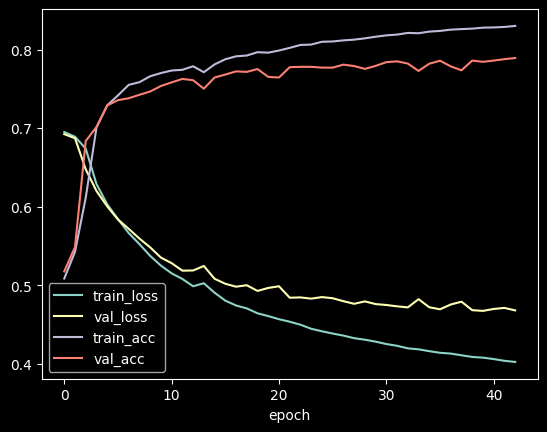

In [39]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()